In [1]:
#Global Header File

using LinearAlgebra             #   Linear Algebra 
using Kronecker                 #   For Kronecker Product 
using MKL                       #   MKL
using Plots, PyPlot             #   Plot Modules
using Random, Distributions     #   Random RandomMatrices
using RandomMatrices            #   Random Matrtices
using CSV, DelimitedFiles       #   File Management stuff
using DataFrames                #   File Management 
using ITensors
#using ITensorsVisualization     #   Packages for ITensors

In [3]:
X = [0 1 ; 1 0 ];
Y = [0 -1im ; im 0 ];
Z = [1 0 ; 0 -1 ];


H=1/sqrt(2)*[1 1 ; 1 -1];

S=[1 0; 0 im];
T=[1 0; 0 exp(im*pi/4)];



function RX(r)
    exp(-im*r/2*X)
end

function RY(r)
    exp(-im*r/2*Y)
end

function RZ(r)
    exp(-im*r/2*Z)
end


CNOT=[1 0 0 0; 0 1 0 0; 0 0 0 1; 0 0 1 0];
REVCNOT=kronecker(H, H)*CNOT*kronecker(H, H);


In [34]:
l=12

o=pi;
h=rand(l)*pi/2;
J=rand(l)*pi/2;
XRow=copy(kronecker(RX(o),l));
ZRow=copy(kronecker(RZ(h[1]),RZ(h[2]),RZ(h[3]),RZ(h[4]),RZ(h[5]),RZ(h[6]),RZ(h[7]),RZ(h[8]),RZ(h[9]),RZ(h[10]),RZ(h[11]),RZ(h[12])));

In [36]:
FU=fill(fill(0.1+im, 4,4), 11);
Theta=0.00;
        
    
   for j in 1:length(FU)
      
   Lone=copy(kronecker(exp(im*J[j]*Z),exp(im*J[j]*Z)))
   Ltwo=copy(kronecker(exp(im*Theta*X),exp(im*Theta*X)))
   Lthree=copy(kronecker(exp(im*Theta*Y),exp(im*Theta*Y)))
    
    
    FU[j]=CNOT*Lthree*Ltwo*Lone*CNOT;
    end
    
    
    
    UOdd=copy(kronecker(FU[1],FU[2],FU[3],FU[4],FU[5],FU[6]));
    UEven=copy(kronecker(I(2),FU[7],FU[8],FU[9],FU[10],FU[11],I(2)));


    A=XRow*UEven*UOdd*ZRow;
    
   

In [37]:

EigA=eigvals(A);
N=angle.(EigA);
Eigvec=eigvecs(A);



In [38]:
Ph=fill(0.0*im, length(EigA)+1,length(EigA));

In [39]:


Ph[1,:]=N;
for i in 1:length(EigA);
    for j in 1:length(EigA)
        Ph[i+1,j]=copy(Eigvec[i,j]);
    end
end

Phnew=copy(Ph[:,sortperm(real(Ph[1, :]))]); # Phase orders the eigenstates from -pi to pi



In [41]:
EigvecNew=Eigvec;

for i in 1:length(EigA);
    for j in 1:length(EigA)
        EigvecNew[i,j]=copy(Phnew[i+1,j]);
    end
end

Corr=fill(0.0, length(EigA),length(EigA));



In [43]:

Xi=copy(kronecker(Z,kronecker(I(2),11)));

for i in 1:length(EigA);
    for j in 1:length(EigA)
        Corr[i,j]=abs(conj(transpose(EigvecNew[:,i]))*Xi*EigvecNew[:,j]);
    end
end

Plots.heatmap(Corr)

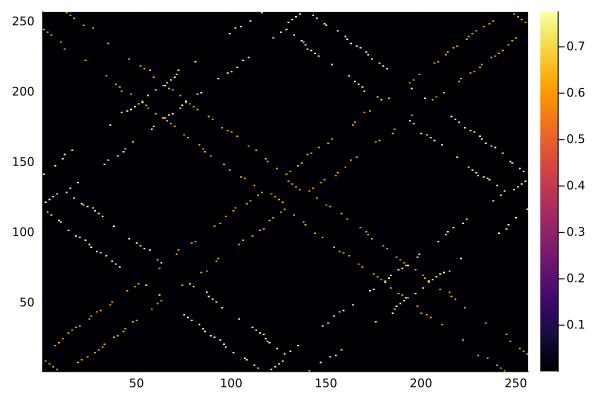

In [ ]:
Xi=copy(kronecker(X,kronecker(I(2),11)));

for i in 1:length(EigA);
    for j in 1:length(EigA)
        Corr[i,j]=abs(conj(transpose(EigvecNew[:,i]))*Xi*EigvecNew[:,j]);
    end
end

Plots.heatmap(Corr)

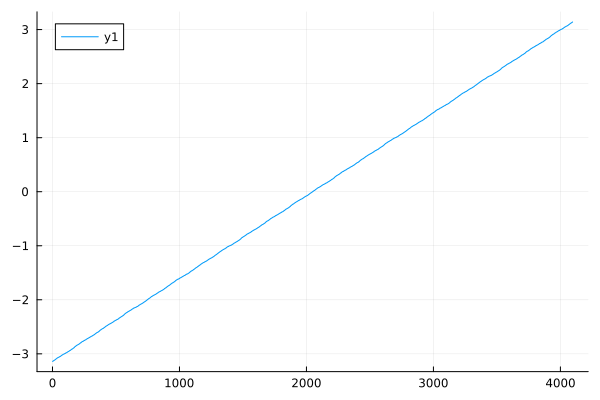

In [40]:
Plots.plot(real(Phnew[1,:]))